In [70]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess
from scipy import stats

In [2]:
data = pd.read_csv("clean_bike_data.csv")
data

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,LAT,LON,DATETIME
0,Theft of Bicycle,2003,1,1,0,0,30XX W 4TH AVE,Kitsilano,49.268399,-123.172906,2003-01-01 00:00:00
1,Theft of Bicycle,2003,1,1,0,0,6X KEEFER PL,Central Business District,49.279617,-123.106816,2003-01-01 00:00:00
2,Theft of Bicycle,2003,1,1,0,5,11XX HORNBY ST,Central Business District,49.278700,-123.127790,2003-01-01 00:05:00
3,Theft of Bicycle,2003,1,1,13,30,X NK_LOC ST,NaN,49.281843,-123.099582,2003-01-01 13:30:00
4,Theft of Bicycle,2003,1,2,1,0,10XX JERVIS ST,West End,49.284857,-123.131873,2003-01-02 01:00:00
...,...,...,...,...,...,...,...,...,...,...,...
30974,Theft of Bicycle,2019,10,22,13,45,20XX W 4TH AVE,Kitsilano,49.268138,-123.151383,2019-10-22 13:45:00
30975,Theft of Bicycle,2019,10,22,18,15,27XX W BROADWAY AVE,Kitsilano,49.264101,-123.167048,2019-10-22 18:15:00
30976,Theft of Bicycle,2019,10,22,20,34,63XX YEW ST,Kerrisdale,49.228779,-123.158805,2019-10-22 20:34:00
30977,Theft of Bicycle,2019,10,23,22,48,39XX W 38TH AVE,Dunbar-Southlands,49.237564,-123.191084,2019-10-23 22:48:00


In [3]:
data['DATETIME'] =  pd.to_datetime(data['DATETIME'], infer_datetime_format=True)

    MONTH  COUNT
0       1   1165
1       2   1165
2       3   1576
3       4   2100
4       5   3064
5       6   3619
6       7   4680
7       8   4713
8       9   3609
9      10   2730
10     11   1532
11     12   1026


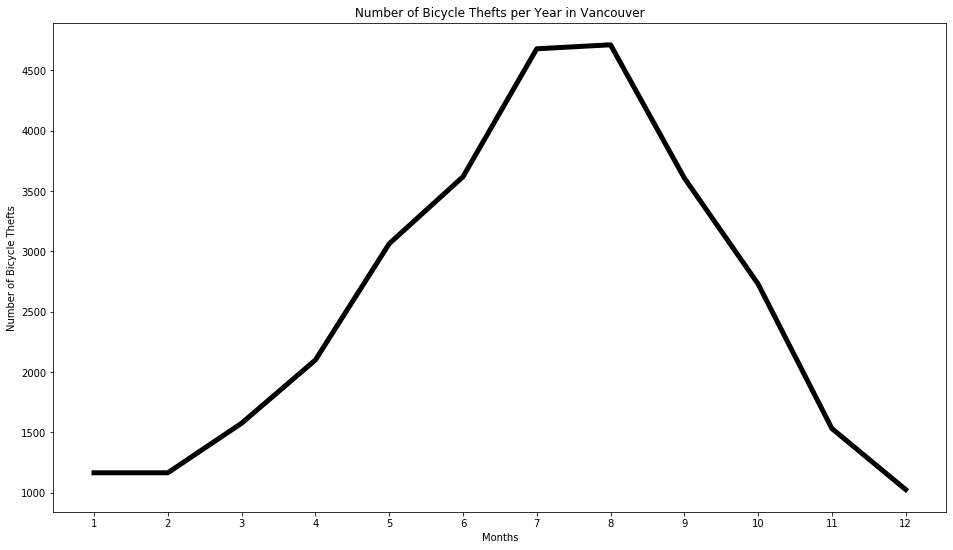

In [75]:
dd = data.groupby(data["MONTH"]).size().reset_index(name="COUNT")
print(dd)

plt.figure(figsize=(16, 9))
plt.plot(dd['MONTH'], dd['COUNT'], linewidth=5, color='k')
plt.xticks(dd['MONTH'])
plt.xlabel("Months")
plt.ylabel("Number of Bicycle Thefts")
plt.title("Number of Bicycle Thefts per Year in Vancouver")
plt.show()

    YEAR  COUNT
0   2003   1418
1   2004   1230
2   2005   1416
3   2006   1467
4   2007   1203
5   2008   1176
6   2009   1641
7   2010   1668
8   2011   1517
9   2012   1817
10  2013   2034
11  2014   2461
12  2015   3064
13  2016   2638
14  2017   2201
15  2018   2165
16  2019   1863


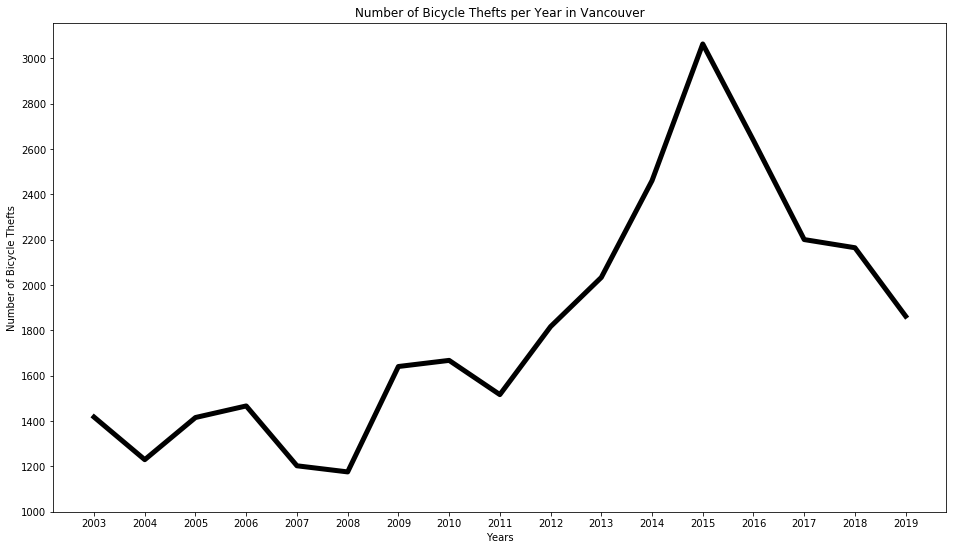

In [66]:
c = data.groupby(data["YEAR"]).size().reset_index(name='COUNT')
print(c)

plt.figure(figsize=(16, 9))
plt.plot(c['YEAR'], c['COUNT'], linewidth=5, color='k')
plt.xticks(c.YEAR)
plt.yticks(np.arange(1000, 3200, step=200))
plt.xlabel("Years")
plt.ylabel("Number of Bicycle Thefts")
plt.title("Number of Bicycle Thefts per Year in Vancouver")
plt.show()